## Course: INF 2178 - Experimental Design For Data Science
## Name: Saad Umar
## Instructor: Shion Guha
## Program: Master of Information
## University of Toronto

In [35]:
from google.colab import drive
drive.mount('/drive', force_remount=True)

Mounted at /drive


In [36]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pip install dfply
from dfply import *
%pip install pingouin
from pingouin import ancova
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
%pip install bioinfokit
from bioinfokit.analys import stat
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as stats
from scipy.stats import levene

In [37]:
# Read in the dataset
df = pd.read_csv("/drive/MyDrive/INF2178/Assignment3/INF2178_A3_data.csv")
df

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2
...,...,...,...,...,...,...,...,...,...
11928,32.51,25.68,11.694,45.63,24.27,20.189,39000.0,39.0,1
11929,31.96,25.73,21.461,47.84,40.35,32.357,26000.0,26.0,1
11930,40.44,30.50,16.836,49.93,41.00,19.803,45000.0,45.0,2
11931,35.51,28.96,28.864,51.60,50.27,35.991,28000.0,28.0,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fallreadingscore             11933 non-null  float64
 1   fallmathscore                11933 non-null  float64
 2   fallgeneralknowledgescore    11933 non-null  float64
 3   springreadingscore           11933 non-null  float64
 4   springmathscore              11933 non-null  float64
 5   springgeneralknowledgescore  11933 non-null  float64
 6   totalhouseholdincome         11933 non-null  float64
 7   incomeinthousands            11933 non-null  float64
 8   incomegroup                  11933 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 839.2 KB


In [39]:
df.nunique()

fallreadingscore               3186
fallmathscore                  3386
fallgeneralknowledgescore      9635
springreadingscore             4161
springmathscore                4184
springgeneralknowledgescore    9703
totalhouseholdincome            393
incomeinthousands               393
incomegroup                       3
dtype: int64

In [40]:
df.corr()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
fallreadingscore,1.000000,0.705691,0.487655,0.831675,0.631966,0.471963,0.297376,0.297376,0.279131
fallmathscore,0.705691,1.000000,0.605225,0.661279,0.824326,0.584103,0.338133,0.338133,0.320123
fallgeneralknowledgescore,0.487655,0.605225,1.000000,0.442213,0.583546,0.853616,0.374639,0.374639,0.365399
springreadingscore,0.831675,0.661279,0.442213,1.000000,0.670761,0.464729,0.263182,0.263182,0.245448
springmathscore,0.631966,0.824326,0.583546,0.670761,1.000000,0.609305,0.315774,0.315774,0.292734
springgeneralknowledgescore,0.471963,0.584103,0.853616,0.464729,0.609305,1.000000,0.368153,0.368153,0.357092
totalhouseholdincome,0.297376,0.338133,0.374639,0.263182,0.315774,0.368153,1.000000,1.000000,0.875993
incomeinthousands,0.297376,0.338133,0.374639,0.263182,0.315774,0.368153,1.000000,1.000000,0.875993
incomegroup,0.279131,0.320123,0.365399,0.245448,0.292734,0.357092,0.875993,0.875993,1.000000


In [41]:
# Calculate change in score from Fall to Spring for Maths
df['changeIn_Maths'] = df['springmathscore'] - df['fallmathscore']

# Calculate change in score from Fall to Spring for reading
df['changeIn_Reading'] = df['springreadingscore'] - df['fallreadingscore']

# Calculate change in score from Fall to Spring for general knowledge
df['changeIn_generalKnowledge'] = df['springgeneralknowledgescore'] - df['fallgeneralknowledgescore']

### EDA

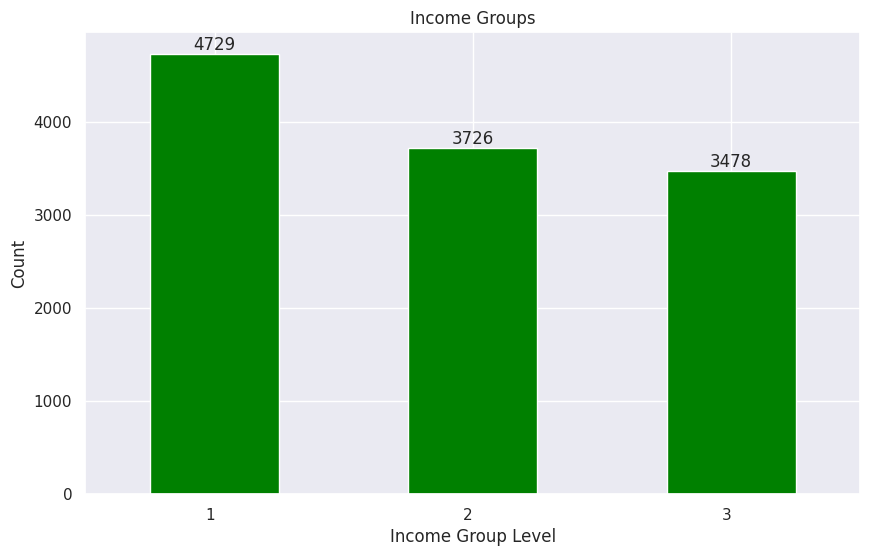

In [42]:
# Setting the size of the figure
plt.figure(figsize = (10,6))

# Get the counts of unique values in the Income Group column
income_Group = df['incomegroup'].value_counts()

# Plot a bar chart with green color
income_Group.plot(kind='bar', color='green')

# Setting titles and labels
plt.title('Income Groups')
plt.xlabel('Income Group Level')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='right')

# Add text labels on top of each bar to display the count
for index, value in enumerate(income_Group):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

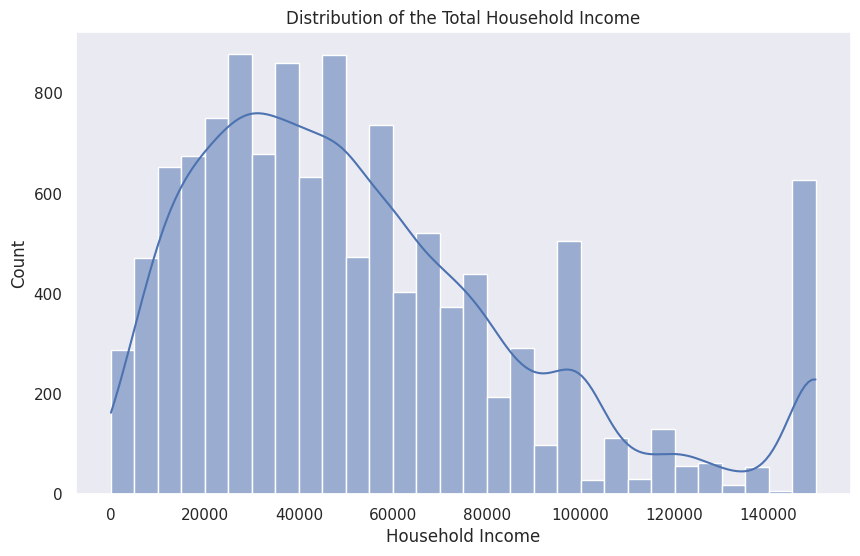

In [43]:
# Distribution of Total Capacity
plt.figure(figsize=(10, 6))
sns.histplot(df['totalhouseholdincome'], bins=30, kde=True)
plt.title('Distribution of the Total Household Income')
plt.xlabel('Household Income')
plt.ylabel('Count')
plt.grid(False)
plt.show()

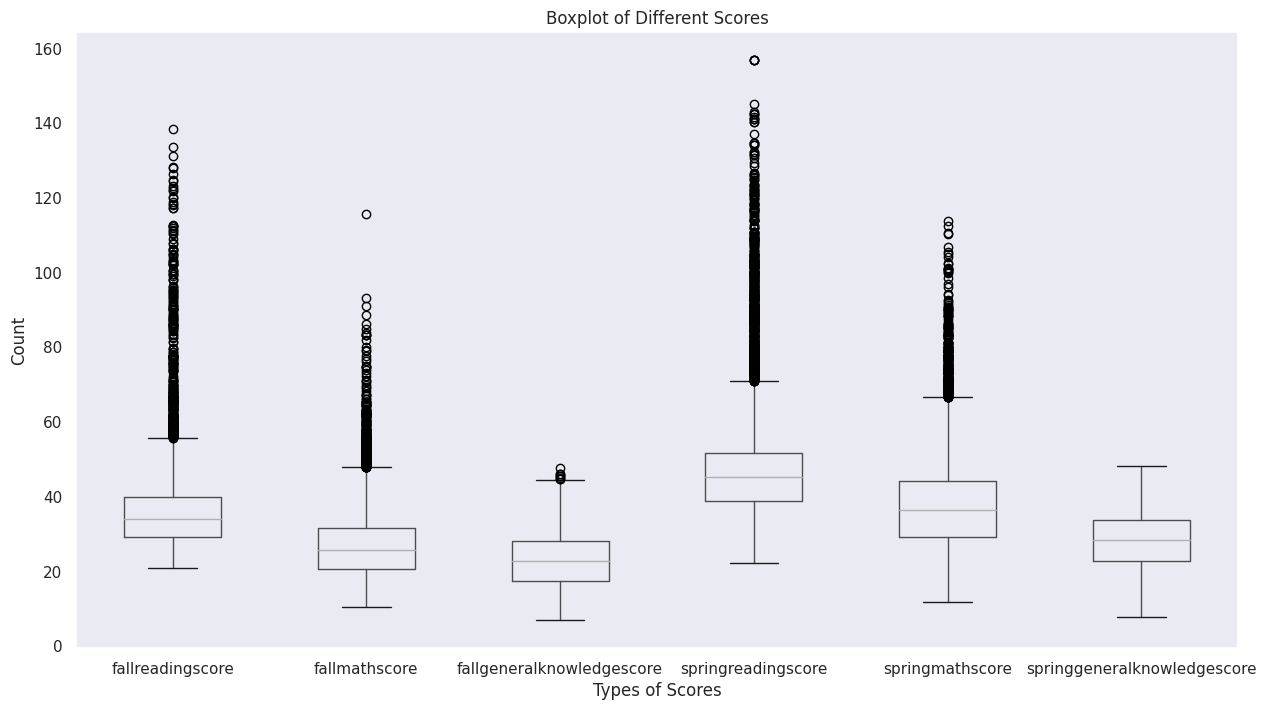

In [44]:
plt.figure(figsize = (15,8))

# Create boxplots
df.boxplot(column=['fallreadingscore', 'fallmathscore', 'fallgeneralknowledgescore', 'springreadingscore', 'springmathscore', 'springgeneralknowledgescore'], grid = False)

# Set labels and title
plt.title('Boxplot of Different Scores')
plt.xlabel('Types of Scores')
plt.ylabel('Count')

# Show the plot
plt.show()

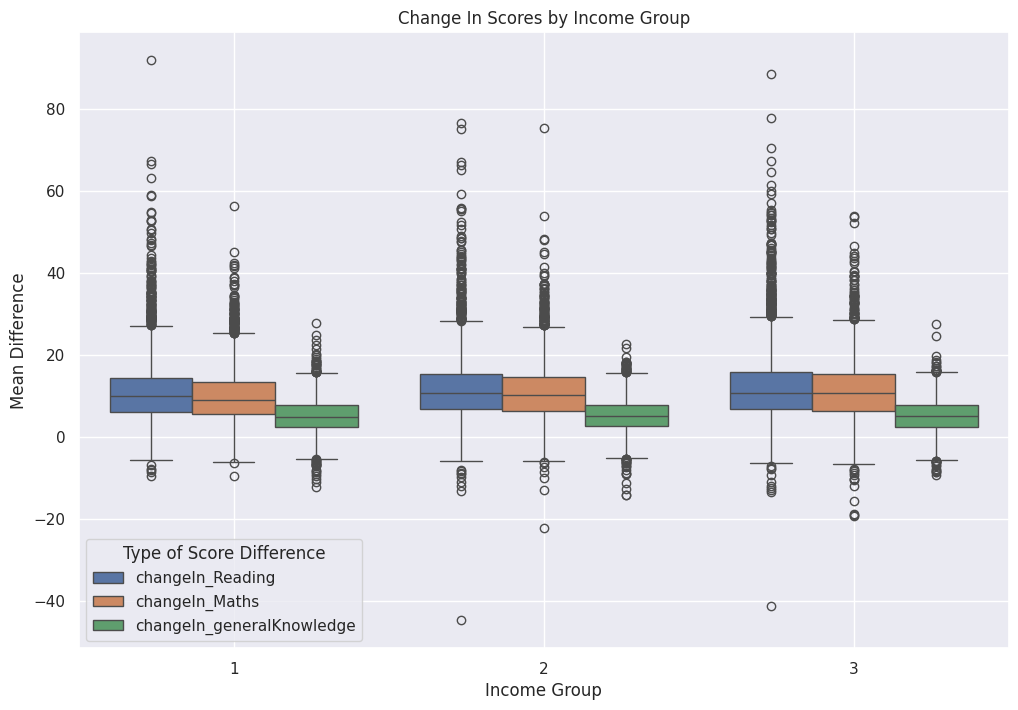

In [45]:
df_melted = df.melt(id_vars=['incomegroup'], value_vars=['changeIn_Reading', 'changeIn_Maths', 'changeIn_generalKnowledge'],
                    var_name='Type', value_name='Mean Difference')

# Plot a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_melted, x='incomegroup', y='Mean Difference', hue='Type')
plt.title('Change In Scores by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Mean Difference')
#plt.xticks(rotation=45)
plt.legend(title='Type of Score Difference')
plt.grid(True)
plt.show()

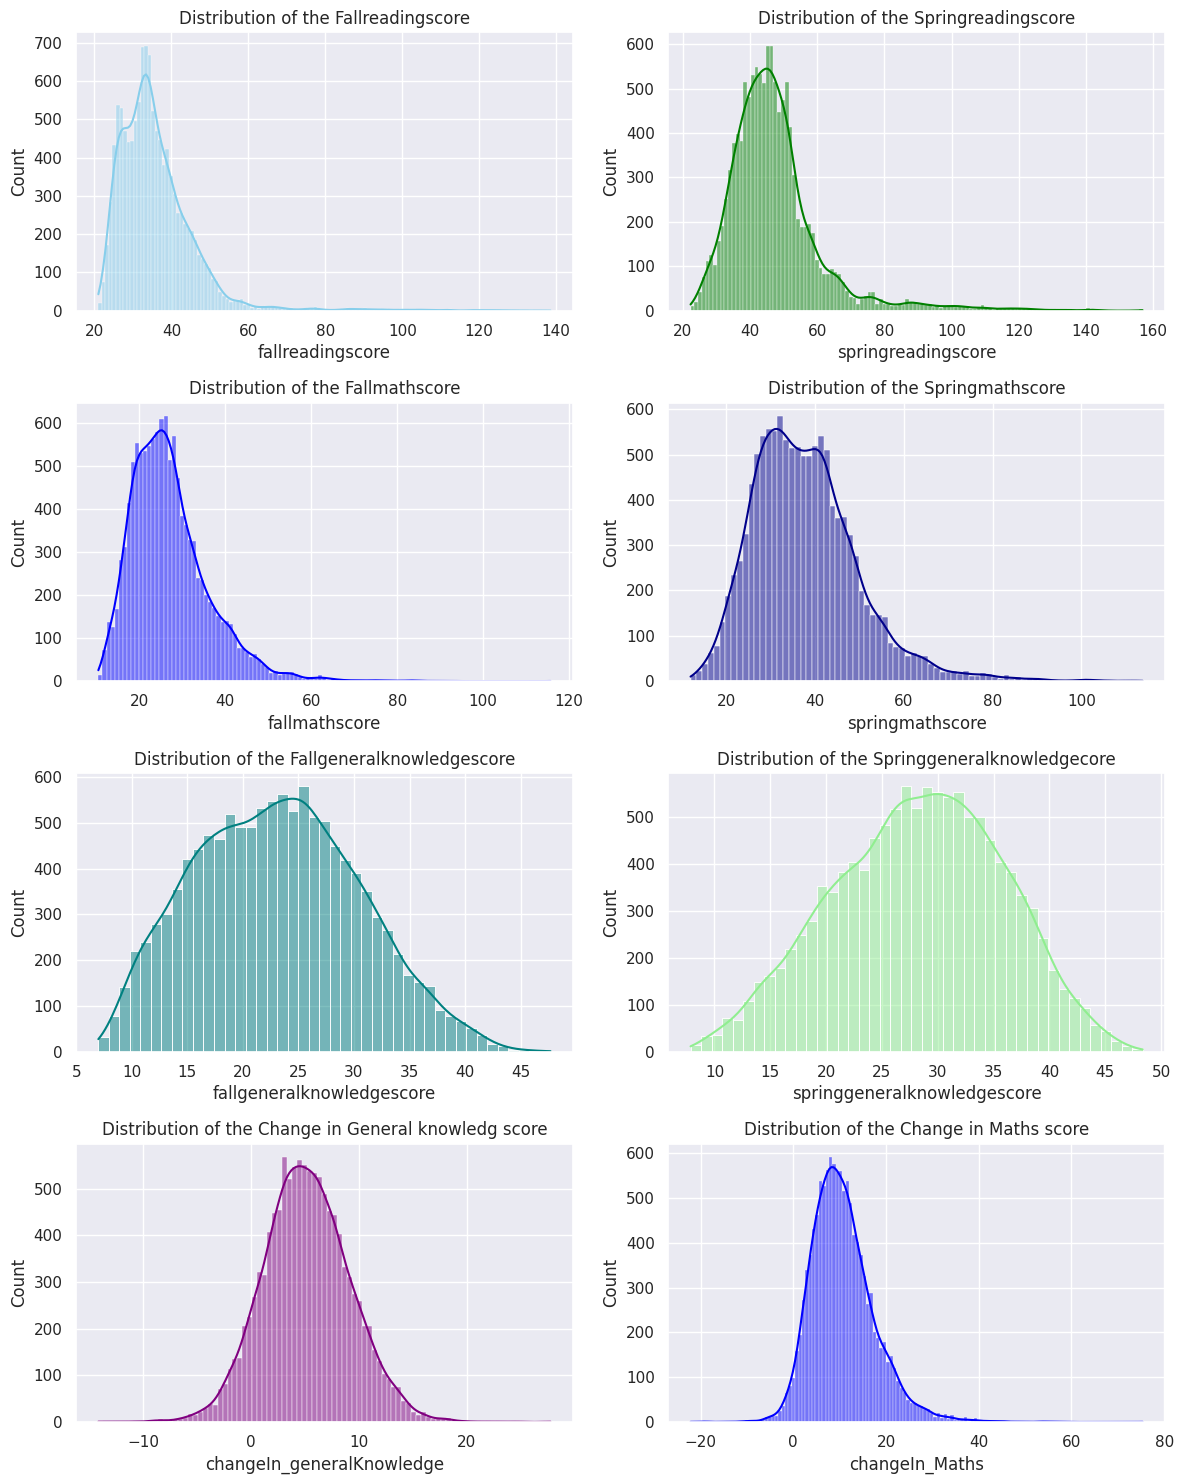

In [46]:
# set the "darkgrid" background for plots
sns.set(style="darkgrid")

# preparing the figure layout
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 15))

# use histograms for numerical variables
sns.histplot(df['fallreadingscore'], kde=True, ax=axes[0,0], color='skyblue')
sns.histplot(df['springreadingscore'], kde=True, ax=axes[0,1], color='green')
sns.histplot(df['fallmathscore'], kde=True, ax=axes[1,0], color='blue')
sns.histplot(df['springmathscore'], kde=True, ax=axes[1,1], color='darkblue')
sns.histplot(df['fallgeneralknowledgescore'], kde=True, ax=axes[2,0], color='teal')
sns.histplot(df['springgeneralknowledgescore'], kde=True, ax=axes[2,1], color='lightgreen')
sns.histplot(df['changeIn_generalKnowledge'], kde=True, ax=axes[3,0], color='purple')
sns.histplot(df['changeIn_Maths'], kde=True, ax=axes[3,1], color='blue')

# set the titles for the histplots
axes[0,0].set_title('Distribution of the Fallreadingscore')
axes[0,1].set_title('Distribution of the Springreadingscore')
axes[1,0].set_title('Distribution of the Fallmathscore')
axes[1,1].set_title('Distribution of the Springmathscore')
axes[2,0].set_title('Distribution of the Fallgeneralknowledgescore')
axes[2,1].set_title('Distribution of the Springgeneralknowledgecore')
axes[3,0].set_title('Distribution of the Change in General knowledg score')
axes[3,1].set_title('Distribution of the Change in Maths score')

# adjusting layout and display the plots
plt.tight_layout()
plt.show()

<ipython-input-47-a02e62a75874>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='incomegroup', y='changeIn_Maths', data=df, ci=None)


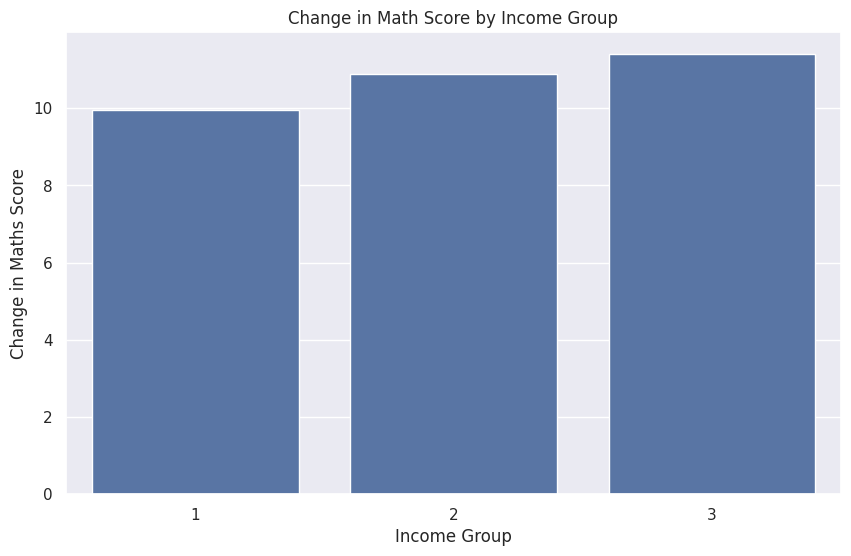

In [47]:
# Setting the size of the figure
plt.figure(figsize=(10, 6))

# Change in Maths scre by Income Group
sns.barplot(x='incomegroup', y='changeIn_Maths', data=df, ci=None)
plt.title('Change in Math Score by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Change in Maths Score')

# Show plot
plt.show()

<ipython-input-48-1343b3497e8f>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='incomegroup', y='changeIn_generalKnowledge', data=df, ci=None)


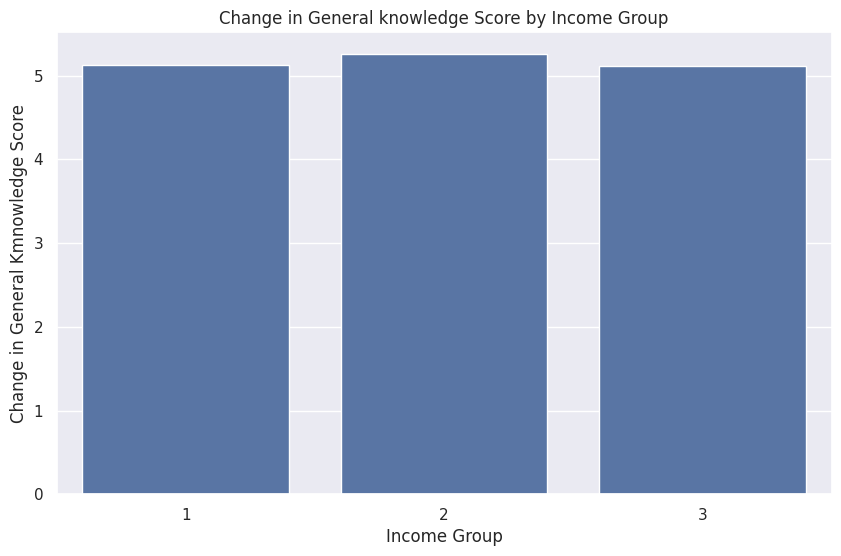

In [48]:
# Setting the size of the figure
plt.figure(figsize=(10, 6))

# Change in General Knowledge score by Income Group
sns.barplot(x='incomegroup', y='changeIn_generalKnowledge', data=df, ci=None)
plt.title('Change in General knowledge Score by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Change in General Kmnowledge Score')

# Show plot
plt.show()

#### ANCOVA 1: Does the change in general knowledge vary at the end of the two semesters across different income groups, while controlling for the influence of the change in math scores?

In [49]:
# Perform the ANCOVA, predicting fall general score
model = ols('changeIn_generalKnowledge ~ incomegroup + changeIn_Maths', data=df).fit()

# Extract p-values
p_values = model.pvalues

# Apply formatting to the p-values
formatted_p_values = p_values.apply(lambda x: '<0.001' if x < 0.001 else f'{x:.3f}')

# Get the model summary as a DataFrame
model_summary = pd.DataFrame(model.summary().tables[1].data[1:], columns=model.summary().tables[1].data[0])

# Replace the p-values in the DataFrame with the formatted values
model_summary['P>|t|'] = formatted_p_values.values

# Convert the DataFrame back to a list of lists
model_summary_list = model_summary.values.tolist()

# Replace the p-values in the model summary
model_summary_list[0][-1] = 'P>|t|'

# Print the modified summary of the model
print(pd.DataFrame(model_summary_list, columns=model_summary.columns).to_string(index=False))
print()
print()
# Print the summary of the model
model.summary()


                     coef   std err         t  P>|t|    [0.025    0.975]
     Intercept     4.3433     0.105    41.417 <0.001     4.138     P>|t|
   incomegroup    -0.0602     0.045    -1.344  0.179    -0.148     0.028
changeIn_Maths     0.0874     0.005    16.255 <0.001     0.077     0.098




<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     changeIn_generalKnowledge   R-squared:                       0.022
Model:                                   OLS   Adj. R-squared:                  0.022
Method:                        Least Squares   F-statistic:                     132.1
Date:                       Sun, 24 Mar 2024   Prob (F-statistic):           1.76e-57
Time:                               01:59:46   Log-Likelihood:                -33506.
No. Observations:                      11933   AIC:                         6.702e+04
Df Residuals:                          11930   BIC:                         6.704e+04
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.3433      0.105     41.417      0.000       4.138       4.549
incomegroup       -0.0602      0.045     -1.344      0.179      -0.148       0.028
changeIn_Maths     0.0874      0.005     16.255      0.000       0.077       0.098
==============================================================================
Omnibus:                      116.395   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.332
Skew:                           0.117   Prob(JB):                     7.61e-37
Kurtosis:                       3.529   Cond. No.                         38.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Alternative Method to perform ANCOVA on the same variables as above
ancova_result = ancova(data=df, dv='changeIn_generalKnowledge', covar='changeIn_Maths', between='incomegroup')

# Apply formatting to the p-unc column
ancova_result['p-unc'] = ancova_result['p-unc'].apply(lambda x: '< 0.001' if x < 0.001 else f'{x:.3f}')
ancova_result

,Source,SS,DF,F,p-unc,np2
0,incomegroup,64.428179,2,2.002486,0.135,0.000336
1,changeIn_Maths,4238.921076,1,263.499036,< 0.001,0.021612
2,Residual,191902.370105,11929,NaN,nan,NaN


In [51]:
# Ancova with the interaction term
model1 = ols('changeIn_generalKnowledge ~ C(incomegroup)*changeIn_Maths', data=df).fit()

# Extract p-values
p_values = model1.pvalues

# Apply formatting to the p-values
formatted_p_values = p_values.apply(lambda x: '<0.001' if x < 0.001 else f'{x:.3f}')

# Get the model summary as a DataFrame
model1_summary = pd.DataFrame(model1.summary().tables[1].data[1:], columns=model1.summary().tables[1].data[0])

# Replace the p-values in the DataFrame with the formatted values
model1_summary['P>|t|'] = formatted_p_values.values

# Convert the DataFrame back to a list of lists
model1_summary_list = model1_summary.values.tolist()

# Replace the p-values in the model summary
model1_summary_list[0][-1] = 'P>|t|'

# Print the modified summary of the model
print(pd.DataFrame(model1_summary_list, columns=model1_summary.columns).to_string(index=False))
print()
print()
# Print the summary of the model
model1.summary()


                                         coef   std err         t  P>|t|    [0.025    0.975]
                         Intercept     4.0664     0.108    37.726 <0.001     3.855     P>|t|
               C(incomegroup)[T.2]     0.2951     0.164     1.801  0.072    -0.026     0.616
               C(incomegroup)[T.3]     0.2194     0.166     1.326  0.185    -0.105     0.544
                    changeIn_Maths     0.1060     0.009    11.642 <0.001     0.088     0.124
C(incomegroup)[T.2]:changeIn_Maths    -0.0239     0.013    -1.809  0.071    -0.050     0.002
C(incomegroup)[T.3]:changeIn_Maths    -0.0332     0.013    -2.553  0.011    -0.059    -0.008




<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     changeIn_generalKnowledge   R-squared:                       0.022
Model:                                   OLS   Adj. R-squared:                  0.022
Method:                        Least Squares   F-statistic:                     54.71
Date:                       Sun, 24 Mar 2024   Prob (F-statistic):           2.21e-56
Time:                               01:59:46   Log-Likelihood:                -33502.
No. Observations:                      11933   AIC:                         6.702e+04
Df Residuals:                          11927   BIC:                         6.706e+04
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              4.0664      0.108     37.726      0.000       3.855       4.278
C(incomegroup)[T.2]                    0.2951      0.164      1.801      0.072      -0.026       0.616
C(incomegroup)[T.3]                    0.2194      0.166      1.326      0.185      -0.105       0.544
changeIn_Maths                         0.1060      0.009     11.642      0.000       0.088       0.124
C(incomegroup)[T.2]:changeIn_Maths    -0.0239      0.013     -1.809      0.071      -0.050       0.002
C(incomegroup)[T.3]:changeIn_Maths    -0.0332      0.013     -2.553      0.011      -0.059      -0.008
==============================================================================
Omnibus:                      117.016   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.158
Skew:                           0.116   Prob(JB):                     3.05e-37
Kurtosis:                       3.533   Cond. No.                         83.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

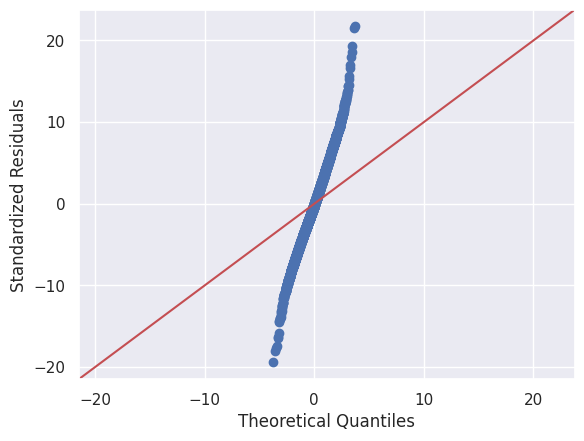

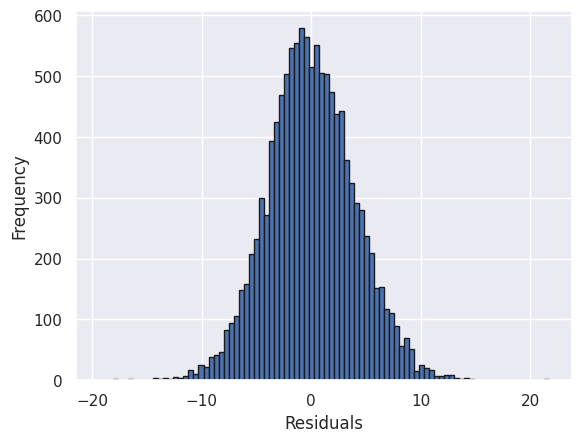

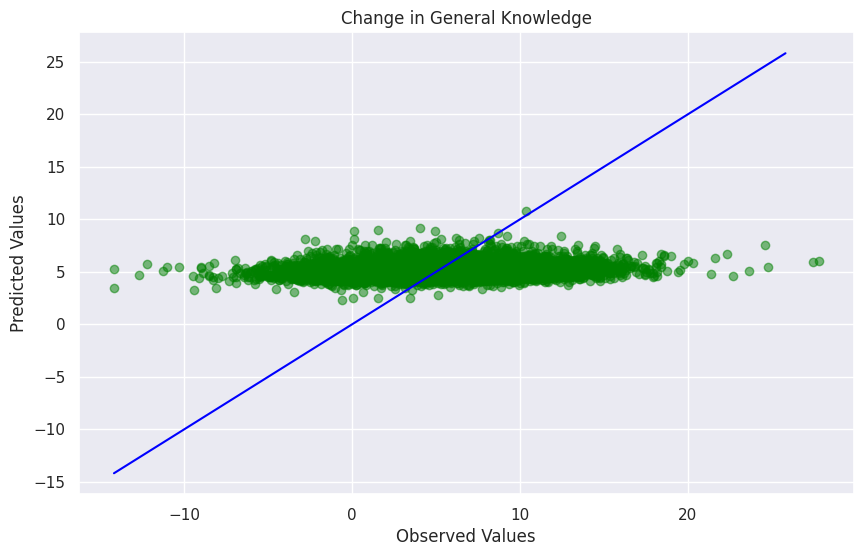

In [62]:
# assumption 1: Normality of residuals
sm.qqplot(model.resid, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

print()
# histogram
plt.hist(model.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

print()
# Plotting the relationship between obs and predicted values
observed_values = df['changeIn_generalKnowledge']
predicted_values = model.fittedvalues

plt.figure(figsize=(10, 6))
plt.scatter(observed_values, predicted_values, color='green', alpha=0.5)
plt.plot(np.arange(min(observed_values), max(observed_values), 5), np.arange(min(observed_values), max(observed_values), 5), color='blue')

plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Change in General Knowledge')
plt.grid(True)
plt.show()

print()

In [53]:
# assumption 1: Shapiro-Wilk test for normality of residuals
w, pvalue = stats.shapiro(model.resid)

# DataFrame to display the results
result_df = pd.DataFrame({
    'Test Statistic': [round(w,3)],
    'p-value': ['<0.001' if pvalue < 0.001 else round(pvalue, 3)]
})

# Display the DataFrame
print("\nShapiro-Wilk test for normality:")
result_df


Shapiro-Wilk test for normality:


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Test Statistic,p-value
0,0.997,<0.001


In [54]:
# Assumption 2: Homogenity of Variance
group1_resid = model.resid[df['incomegroup'] == 1]
group2_resid = model.resid[df['incomegroup'] == 2]
group3_resid = model.resid[df['incomegroup'] == 3]

# Perform Levene's test
statistic, p_value = levene(group1_resid, group2_resid, group3_resid)

# Create a dictionary with the test statistic and p-value
result_dict = {'Levene\'s test statistic': statistic, 'p-value': p_value}

# Convert the dictionary into a DataFrame
result_df = pd.DataFrame(result_dict, index=[''])

# Apply formatting to the values in the DataFrame
result_df = result_df.applymap(lambda x: '<0.001' if x < 0.001 else f'{x:.3f}')

# Print the DataFrame
print("Levene's test result:")
result_df

Levene's test result:


,Levene's test statistic,p-value
,0.182,0.834


In [55]:
# Perform Tukey's HSD post hoc test
tukey_result = pairwise_tukeyhsd(endog=df['changeIn_generalKnowledge'], groups=df['incomegroup'])

# Convert results to a DataFrame
tukey_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])

# Round p-adj values to 2 decimal places and replace values less than 0.001 with '<0.001'
tukey_df['p-adj'] = tukey_df['p-adj'].round(3)
tukey_df.loc[tukey_df['p-adj'] < 0.001, 'p-adj'] = "<0.001"

# Print the modified Tukey's HSD results
tukey_df

,group1,group2,meandiff,p-adj,lower,upper,reject
0,1,2,0.1339,0.287,-0.0743,0.3421,False
1,1,3,-0.0059,0.998,-0.2182,0.2064,False
2,2,3,-0.1399,0.309,-0.3639,0.0842,False


#### ANCOVA 2: Is there a change in the Reading score across the income groups if we set the 'ChangeIn_generalKnowledge' as the covariate.

In [56]:
# Perform ANCOVA on the same variables as above
ancova_result2 = ancova(data=df, dv='changeIn_Reading', covar='changeIn_generalKnowledge', between='incomegroup')

# Apply formatting to the p-unc column
ancova_result2['p-unc'] = ancova_result2['p-unc'].apply(lambda x: '< 0.001' if x < 0.001 else f'{x:.3f}')
ancova_result2

,Source,SS,DF,F,p-unc,np2
0,incomegroup,4209.528531,2,32.835548,< 0.001,0.005475
1,changeIn_generalKnowledge,11074.220434,1,172.764288,< 0.001,0.014276
2,Residual,764650.940643,11929,NaN,nan,NaN


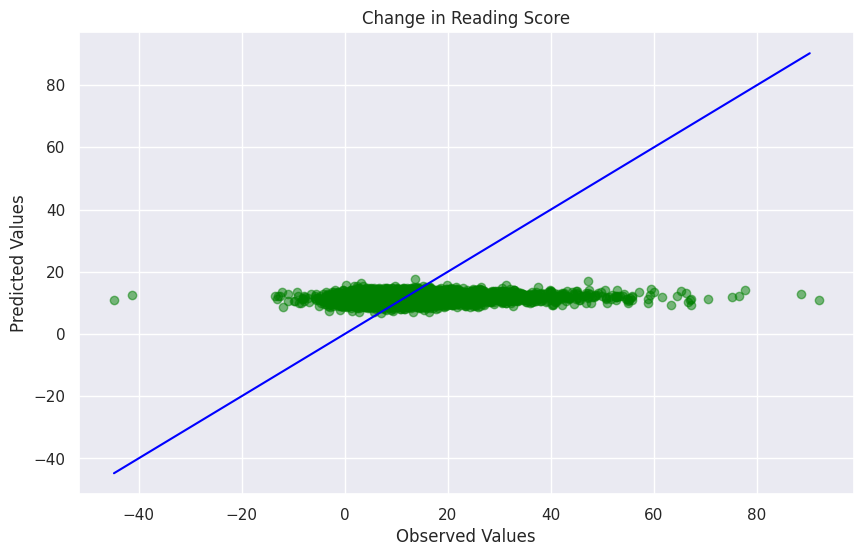

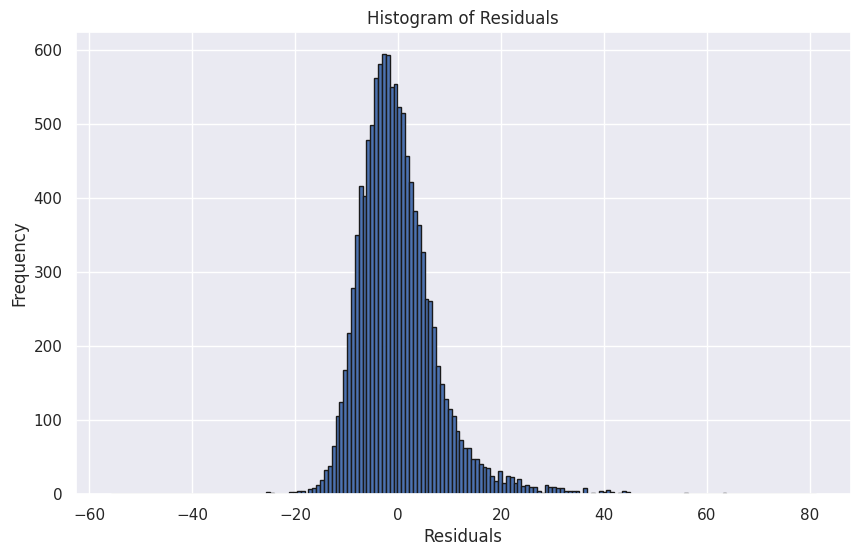

In [57]:
model2 = ols('changeIn_Reading ~ C(incomegroup) + changeIn_generalKnowledge', data=df).fit()

# Plotting the relationship between obs and predicted values
observed_values = df['changeIn_Reading']
predicted_values = model2.fittedvalues

plt.figure(figsize=(10, 6))
plt.scatter(observed_values, predicted_values, color='green', alpha=0.5)
plt.plot(np.arange(min(observed_values), max(observed_values), 5), np.arange(min(observed_values), max(observed_values), 5), color='blue')

plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Change in Reading Score')
plt.grid(True)
plt.show()

print()
# histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(model2.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

#### ANCOVA 3: Is there a change in the Maths score across the income groups if we set the 'ChangeIn_generakKnowledge' as the covariate.

In [58]:
# Perform ANCOVA on the same variables as above
ancova_result3 = ancova(data=df, dv='changeIn_Maths', covar='changeIn_generalKnowledge', between='incomegroup')

# Apply formatting to the p-unc column
ancova_result3['p-unc'] = ancova_result3['p-unc'].apply(lambda x: '< 0.001' if x < 0.001 else f'{x:.3f}')
ancova_result3

,Source,SS,DF,F,p-unc,np2
0,incomegroup,4388.326834,2,48.089207,< 0.001,0.007998
1,changeIn_generalKnowledge,12022.654936,1,263.499036,< 0.001,0.021612
2,Residual,544283.777802,11929,NaN,nan,NaN


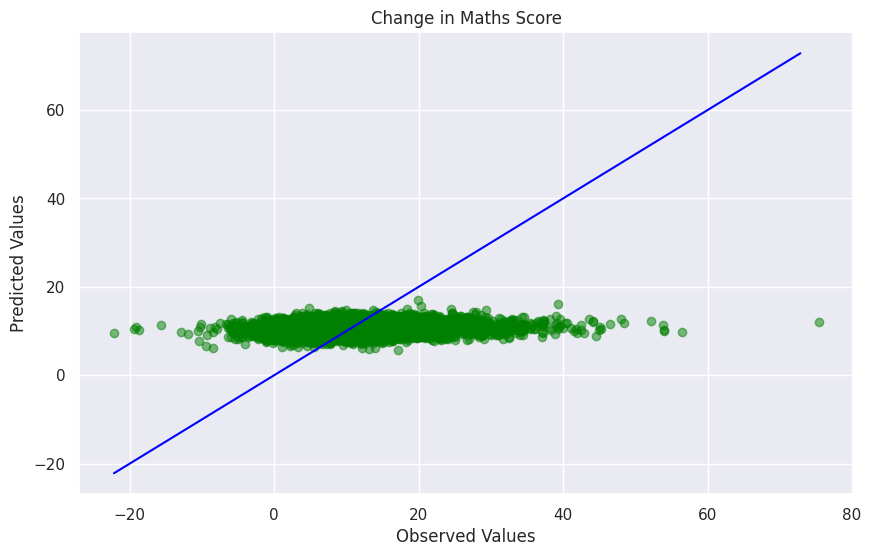

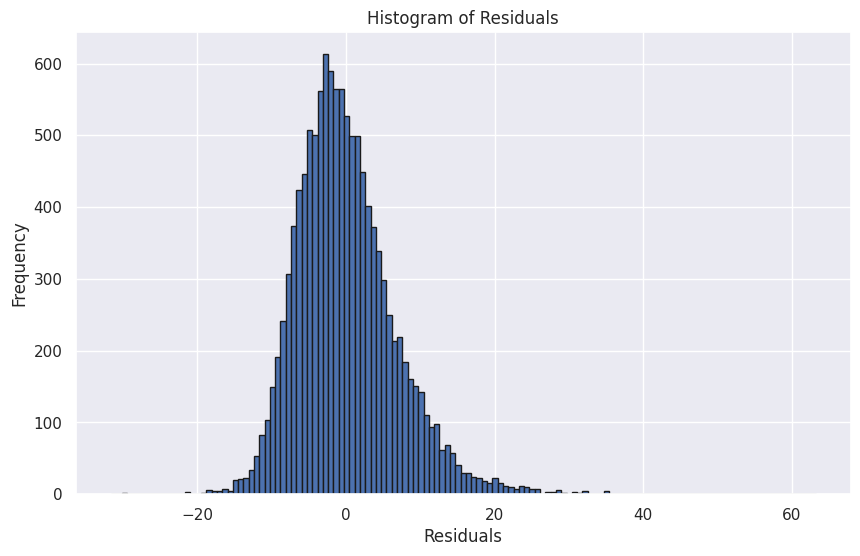

In [59]:
model3 = ols('changeIn_Maths ~ C(incomegroup) + changeIn_generalKnowledge', data=df).fit()

# Plotting the reletionship between obs and predicted values
observed_values = df['changeIn_Maths']
predicted_values = model3.fittedvalues

plt.figure(figsize=(10, 6))
plt.scatter(observed_values, predicted_values, color='green', alpha=0.5)
plt.plot(np.arange(min(observed_values), max(observed_values), 5), np.arange(min(observed_values), max(observed_values), 5), color='blue')

plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Change in Maths Score')
plt.grid(True)
plt.show()

print()
# histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(model3.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()